- #### Problem Statement 

To develop a supervised machine learning algorithm to predict the number of wins for a Major League Baseball team in the 2015 season based on performance indicators from the 2014 season, you can follow these steps. The focus will be on using regression techniques since the target variable (number of wins) is continuous

In [254]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Now we will importing the Baseball Case Study dataset in our jupyter notebook

In [255]:
data_file=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv')

#### Exploratory Data Analysis (EDA)

In [256]:
#showing first 5 rows
data_file.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [257]:
#showing bottom 5 rows
data_file.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [258]:
data_file.shape

(30, 17)

In [259]:
data_file.columns 

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

##### After loading Avocado dataset we can observed that 
- The dataset contain 30 rows and 17 columns 
- Input Features
1. W (Wins)
2. R (Runs)
3. AB (At Bats)
4. H (Hits)
5. 2B (Doubles)
6. 3B (Triples)
7. HR (Home Runs)
8. BB (Base on Balls)
9. SO (Strikeouts)
10. SB (Stolen Bases)
11. RA (Runs Allowed)
12. ER (Earned Runs)
13. ERA (Earned Run Average)
14. CG (Complete Games)
15. SHO (Shutouts)
16. SV (Saves)
17. E (Errors)

In [260]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


##### From above we can observed that 
- The columns 'W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER','CG', 'SHO', 'SV', 'E' have an integer data type.
- The columns 'ERA' have a float data type.

In [261]:
# Showing Null values
data_file.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

- We can see that there are no null values present in Baseball Case Study dataset and We will see with the help of heatmap

Text(0.5, 1.0, 'Missing Values')

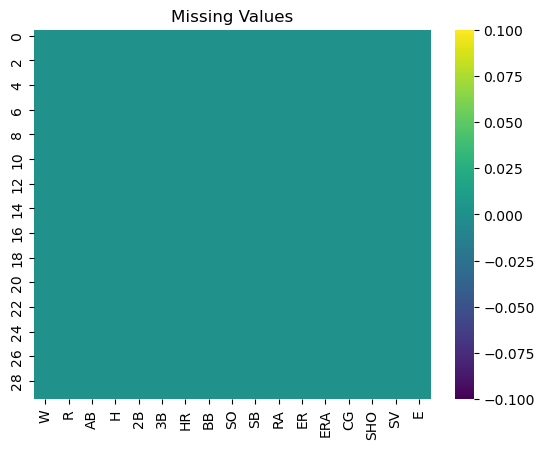

In [262]:
sns.heatmap(data=data_file.isnull(),cmap='viridis',cbar=True,)
plt.title('Missing Values')

In [263]:
# checking unique values in each columns
for i in data_file.columns:
    print(f"unique values in {i} => {data_file[i].unique()}",'\n')

unique values in W => [ 95  83  81  76  74  93  87  80  78  88  86  85  68 100  98  97  64  90
  71  67  63  92  84  79] 

unique values in R => [724 696 669 622 689 891 764 713 644 748 751 729 661 656 694 647 697 655
 640 683 703 613 573 626 667 720 650 737] 

unique values in AB => [5575 5467 5439 5533 5605 5509 5567 5485 5640 5511 5459 5417 5544 5600
 5484 5631 5491 5480 5571 5527 5428 5463 5420 5529 5385 5565 5649 5457
 5572] 

unique values in H => [1497 1349 1395 1381 1515 1480 1397 1370 1383 1495 1419 1363 1331 1379
 1405 1386 1462 1341 1378 1382 1351 1420 1361 1374 1346 1486 1494 1324
 1479] 

unique values in 2B => [300 277 303 260 289 308 272 246 278 294 279 243 262 288 292 274 257 295
 265 236 251 263] 

unique values in 3B => [42 44 29 27 49 17 19 20 32 33 26 21 22 46 39 30 34 13 40 18 37 48 36] 

unique values in HR => [139 156 141 136 151 232 212 217 167 161 172 230 176 198 146 137 140 171
 145 177 120 100 130 187 154 148 186] 

unique values in BB => [383 439 533 404 455

In [264]:
data_file.duplicated().sum()

0

In [265]:
data_file.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


From the above statistics summary, we can observe the following:

1. **No Missing Values:**
   - Confirmed: There are no missing values in the dataset, ensuring completeness of data for analysis.

2. **Skewness in Columns:**
   - **Right Skewness:**
     - Observed in all columns where the mean is greater than the median.
     - Interpretation: Right skewness (positive skewness) indicates that there are a few exceptionally high values pulling the mean to the right of the median. This often occurs in datasets where extreme high values are present.

3. **Outliers:**
   - Noted difference between the 75th percentile and the maximum value in some columns.
     - This indicates the presence of outliers, which are values significantly higher than the majority of the data. Outliers can have a substantial effect on the mean and standard deviation.

4. **Standard Deviation:**
   - All columns have high standard deviation except for the 'ERA' column.
   - Interpretation: High standard deviation implies greater variability in the data for these columns. This suggests that the values are spread out over a wider range, which may pose challenges for robust statistical or machine learning models.

### Visualization 

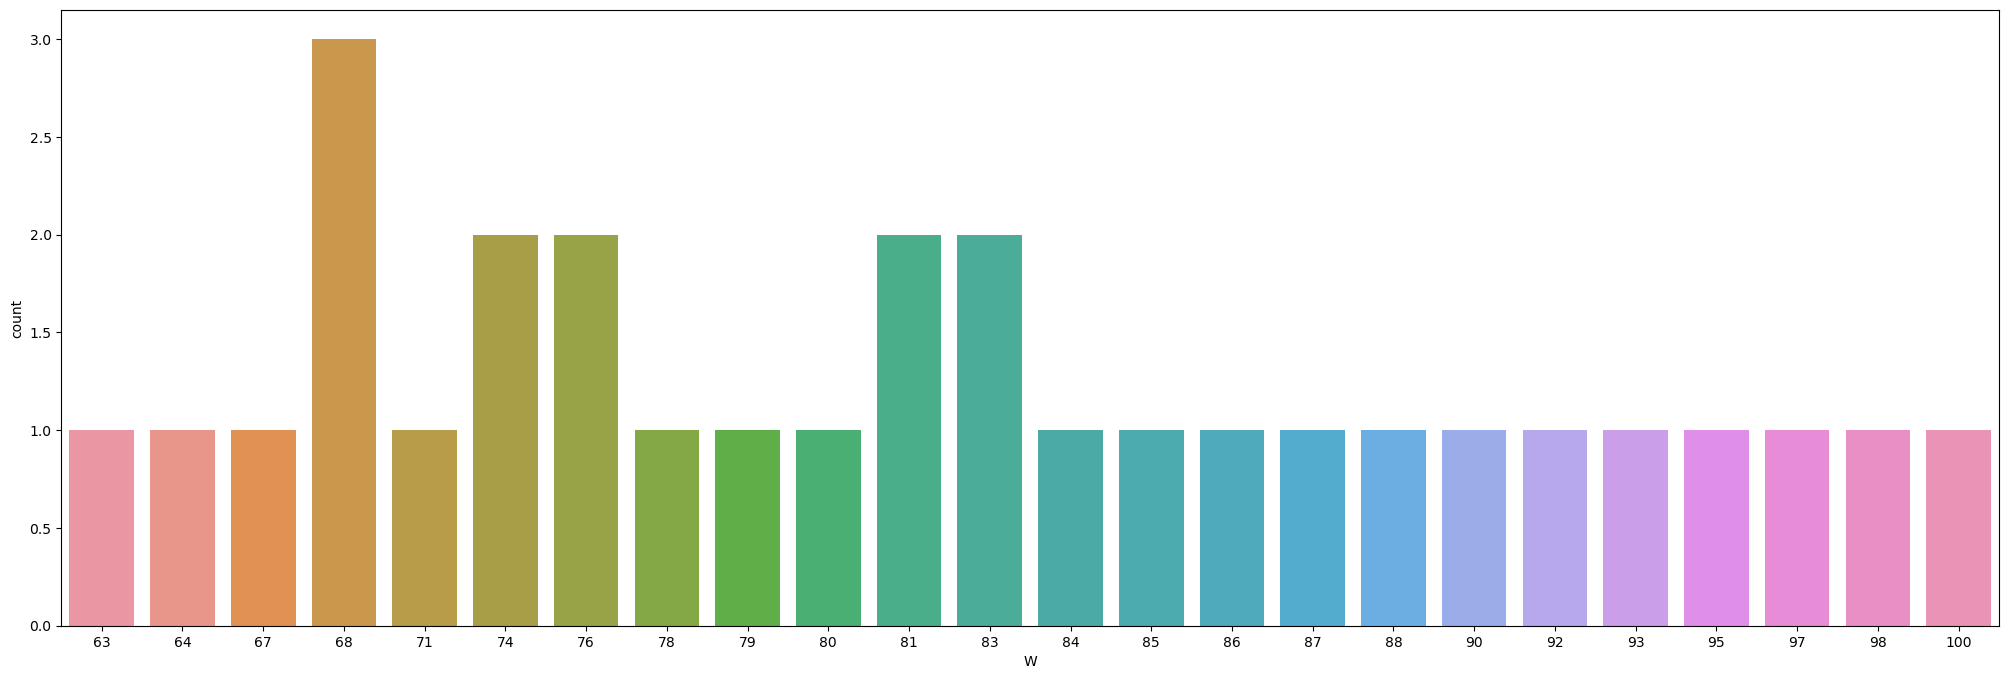

In [266]:
plt.figure(figsize=(25,8))
ax=sns.countplot(data=data_file,x='W')
plt.xticks()
plt.show()

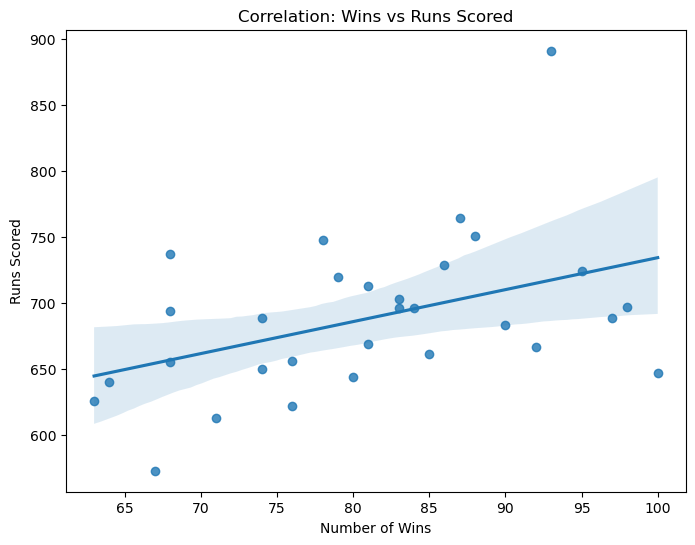

In [267]:
plt.figure(figsize=(8, 6))
sns.regplot(x='W', y='R', data=data_file)
plt.title('Correlation: Wins vs Runs Scored')
plt.xlabel('Number of Wins')
plt.ylabel('Runs Scored')
plt.show()

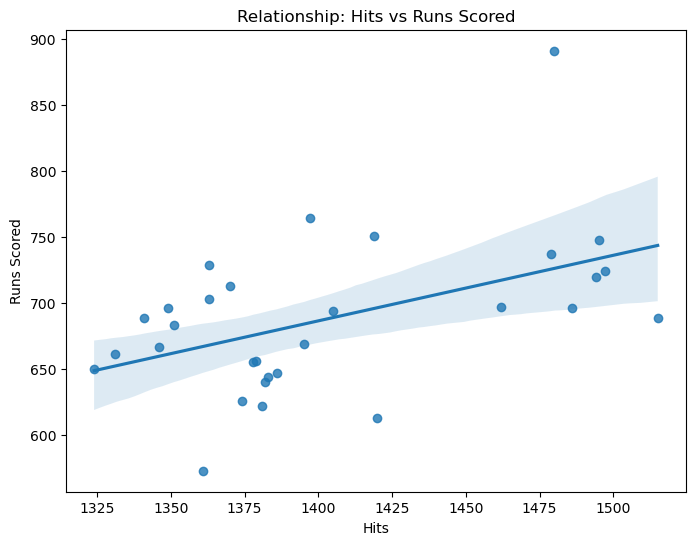

In [268]:
plt.figure(figsize=(8, 6))
sns.regplot(x='H', y='R', data=data_file)
plt.title('Relationship: Hits vs Runs Scored')
plt.xlabel('Hits')
plt.ylabel('Runs Scored')
plt.show()

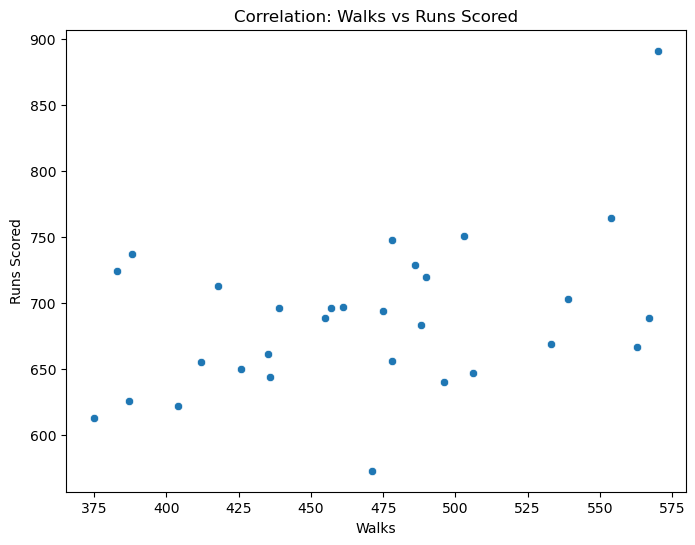

In [269]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BB', y='R', data=data_file)
plt.title('Correlation: Walks vs Runs Scored')
plt.xlabel('Walks')
plt.ylabel('Runs Scored')
plt.show()


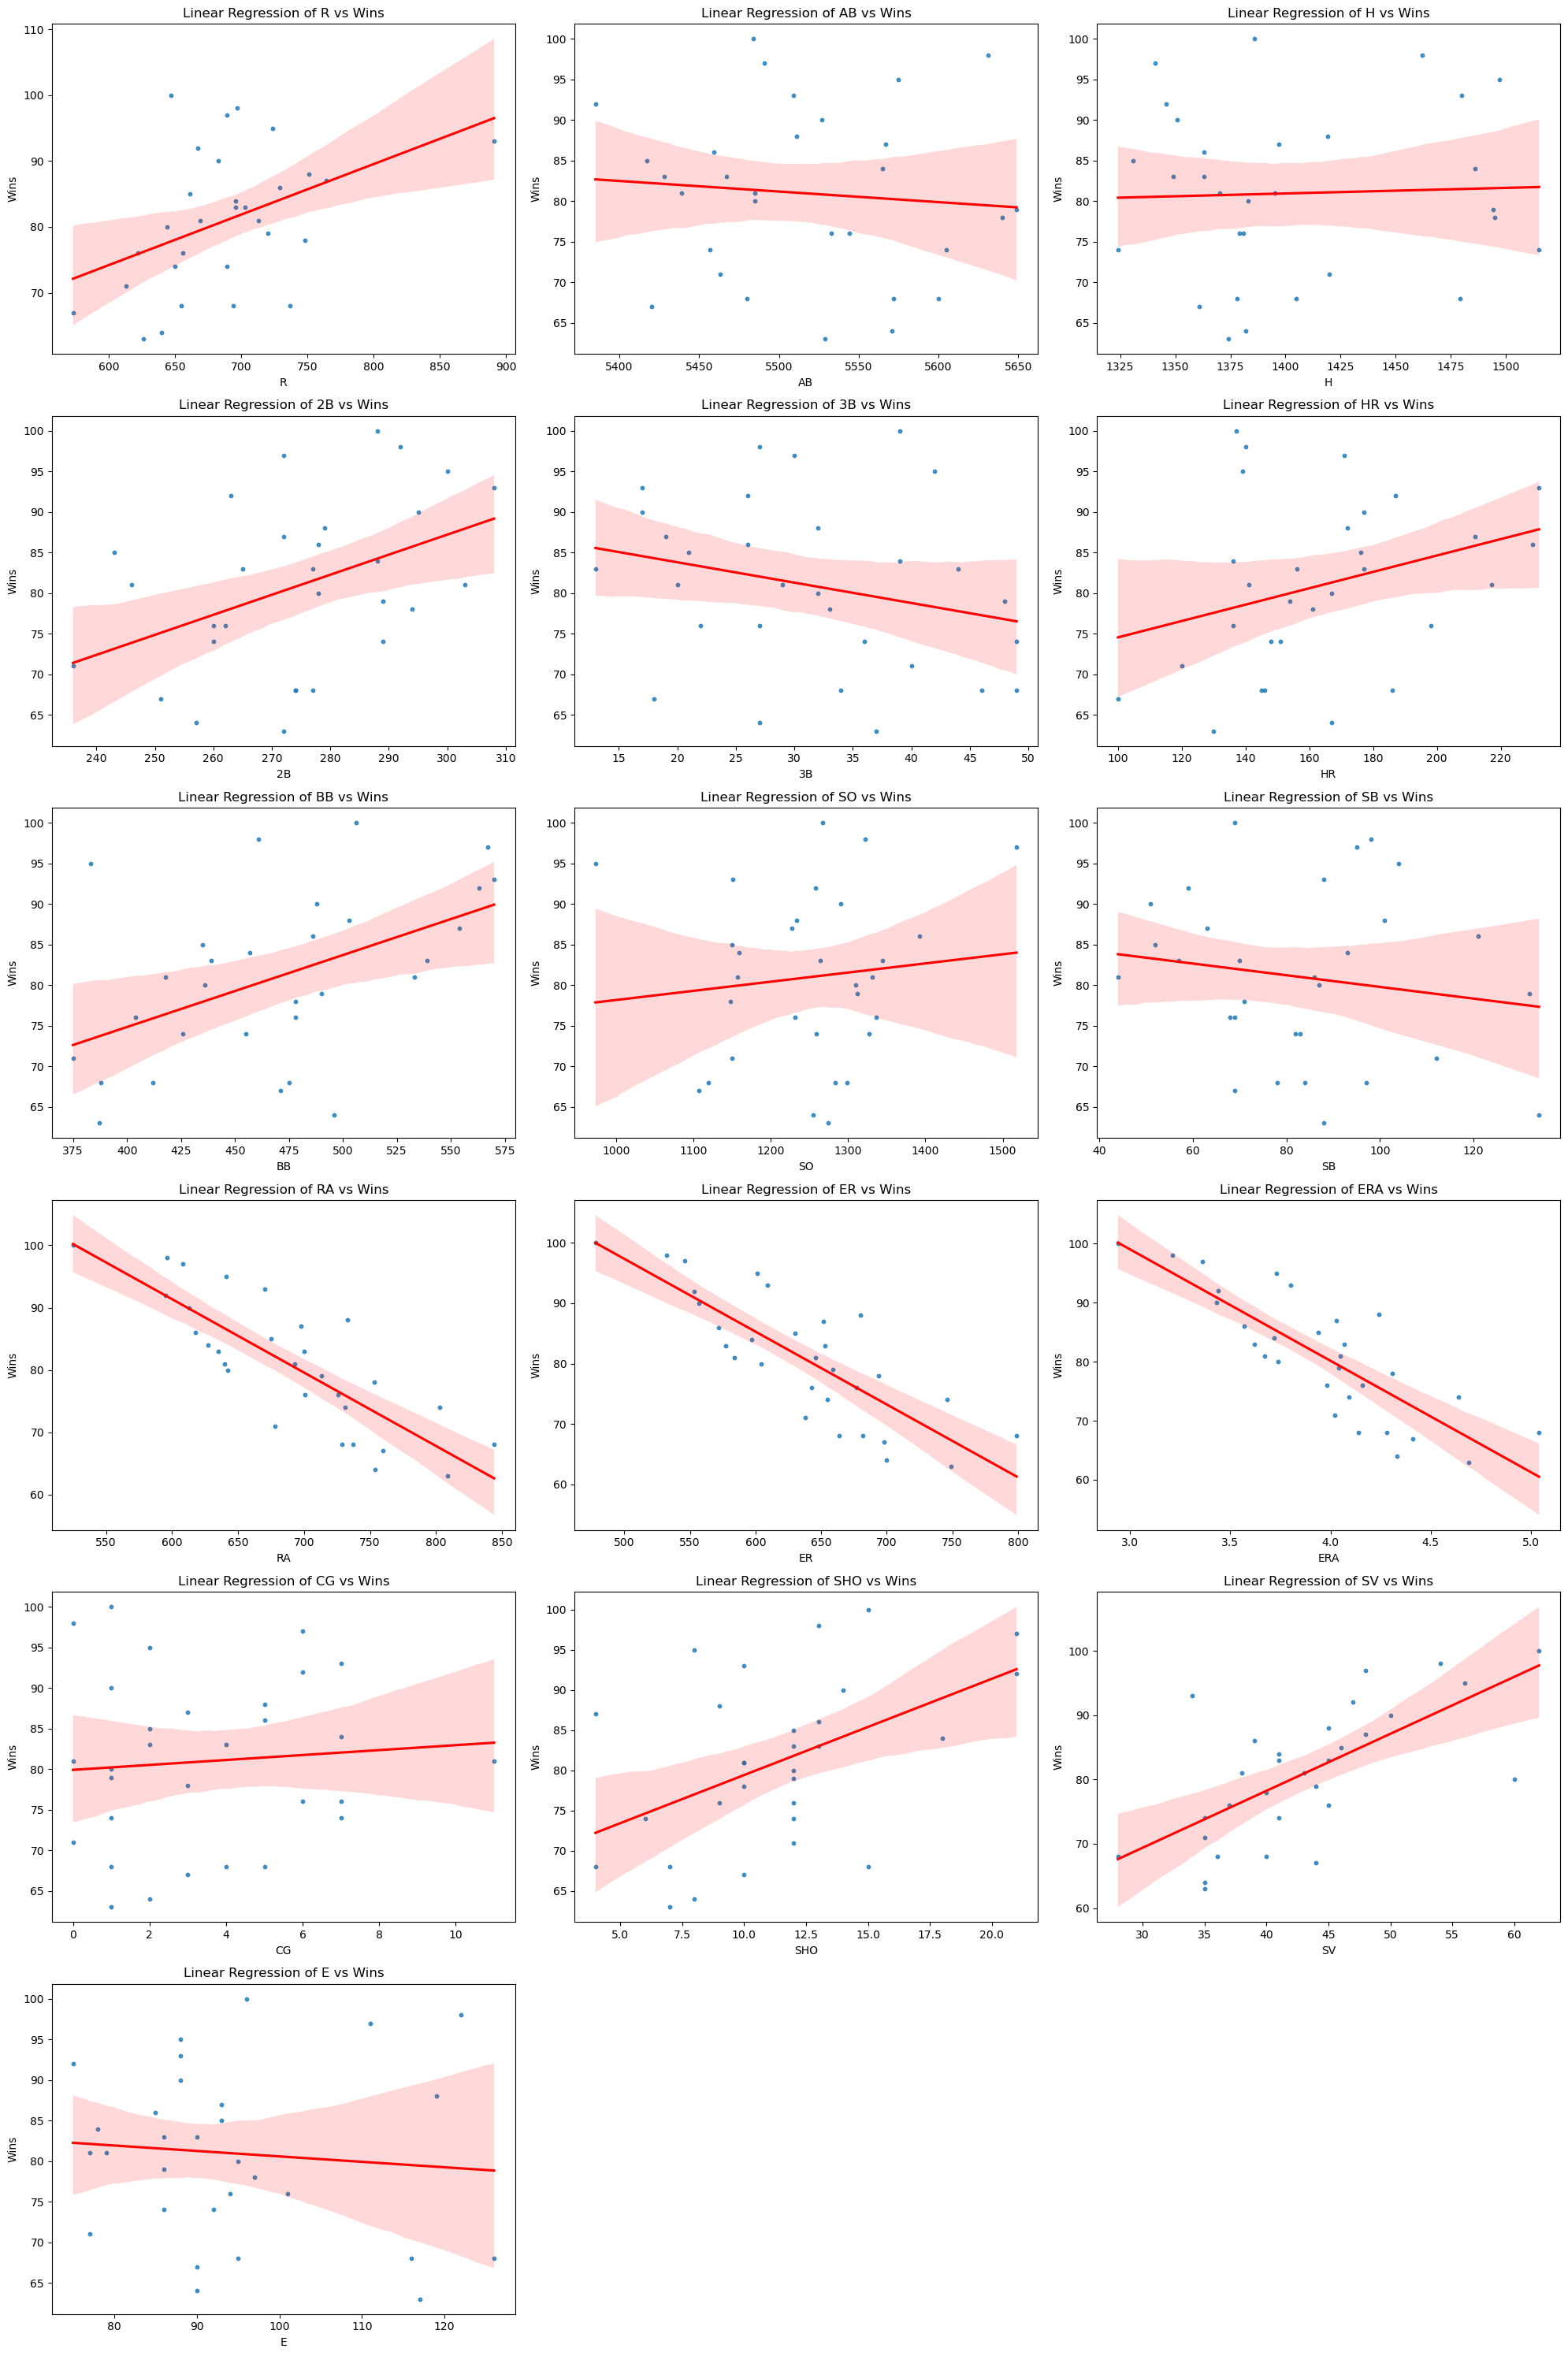

In [270]:
# Define the list of columns to plot against 'AveragePrice'
columns_to_plot = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']

# Number of columns for the subplots
num_cols = 3

# Calculate the number of rows needed
num_rows = len(columns_to_plot) // num_cols + int(len(columns_to_plot) % num_cols != 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten axes for easy iteration, in case num_rows or num_cols is 1
axes = axes.flatten()

# Plot lmplot for each column
for count, column in enumerate(columns_to_plot):
    sns.regplot(x=column, y='W', data=data_file,ax=axes[count], scatter_kws={'s': 10}, line_kws={"color": "red"})
    axes[count].set_title(f'Linear Regression of {column} vs Wins')
    axes[count].set_xlabel(column)
    axes[count].set_ylabel('Wins')

# Hide any remaining empty subplots
for i in range(count + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### General Observations
- **Linear Relationship**: Each subplot shows a linear regression line along with a shaded area representing the confidence interval.
- **Variability**: The spread of data points around the regression line varies for different features, indicating different degrees of correlation between each feature and the number of wins.

### Specific Insights

1. **R (Runs) vs. Wins**
   - **Positive Correlation**: As the number of runs increases, the number of wins also tends to increase.
   - **Insight**: Scoring more runs is associated with winning more games.

2. **AB (At Bats) vs. Wins**
   - **Weak Positive Correlation**: The regression line is almost flat, indicating a very weak positive relationship.
   - **Insight**: The number of at bats has a minimal impact on the number of wins.

3. **H (Hits) vs. Wins**
   - **Weak Positive Correlation**: There is a slight positive trend.
   - **Insight**: The number of hits has a minor positive impact on the number of wins.

4. **2B (Doubles) vs. Wins**
   - **Positive Correlation**: An increase in the number of doubles correlates with more wins.
   - **Insight**: Teams that hit more doubles tend to win more games.

5. **3B (Triples) vs. Wins**
   - **Negative Correlation**: Surprisingly, there is a negative relationship.
   - **Insight**: Teams with more triples tend to win fewer games, which could be due to the small sample size or other underlying factors.

6. **HR (Home Runs) vs. Wins**
   - **Weak Negative Correlation**: There is a slight negative trend.
   - **Insight**: This could indicate that focusing solely on home runs may not be the best strategy for winning games.

7. **BB (Base on Balls) vs. Wins**
   - **Positive Correlation**: More walks are associated with more wins.
   - **Insight**: Drawing walks (getting on base) positively impacts the number of wins.

8. **SO (Strikeouts) vs. Wins**
   - **Very Weak Positive Correlation**: The regression line is almost flat.
   - **Insight**: The number of strikeouts does not significantly affect the number of wins.

9. **SB (Stolen Bases) vs. Wins**
   - **Weak Positive Correlation**: Slight positive trend.
   - **Insight**: Teams with more stolen bases have a minor increase in wins.

10. **RA (Runs Allowed) vs. Wins**
    - **Negative Correlation**: More runs allowed are associated with fewer wins.
    - **Insight**: Allowing more runs generally leads to losing more games.

11. **ER (Earned Runs) vs. Wins**
    - **Negative Correlation**: Similar to RA, more earned runs allowed correlate with fewer wins.
    - **Insight**: Preventing earned runs is crucial for winning games.

12. **ERA (Earned Run Average) vs. Wins**
    - **Negative Correlation**: Higher ERA is associated with fewer wins.
    - **Insight**: Lower ERA (better pitching performance) correlates with more wins.

13. **CG (Complete Games) vs. Wins**
    - **Weak Positive Correlation**: There is a slight positive trend.
    - **Insight**: Pitchers completing games slightly increase the number of wins.

14. **SHO (Shutouts) vs. Wins**
    - **Positive Correlation**: More shutouts are associated with more wins.
    - **Insight**: Pitching shutouts significantly contributes to winning games.

15. **SV (Saves) vs. Wins**
    - **Positive Correlation**: More saves correlate with more wins.
    - **Insight**: Successfully closing games (saves) is linked to winning more games.


#### Checking Correlation with target/Label

In [271]:
corr_matrix=data_file.corr()
corr_matrix

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


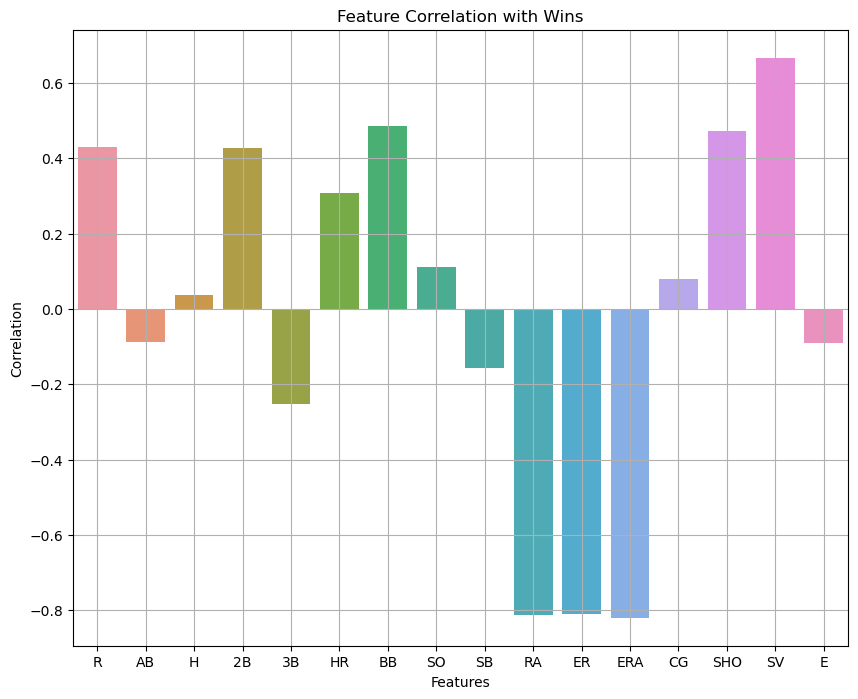

In [272]:
# Plot correlation with target variable
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_matrix['W'].drop('W').index, y=corr_matrix['W'].drop('W').values)
plt.title("Feature Correlation with Wins")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks()
plt.grid(True)
plt.show()

### From above graph 
- **Offensive Metrics (R, 2B, BB)**: These generally show a positive correlation with wins.
- **Defensive Metrics (RA, ER, ERA)**: These show a negative correlation with wins, emphasizing the importance of good pitching.
- **Mixed Metrics (HR, 3B, SO)**: These show weak or unexpected correlations, suggesting that their impact might be more nuanced or context-dependent.

### Checking Outliers

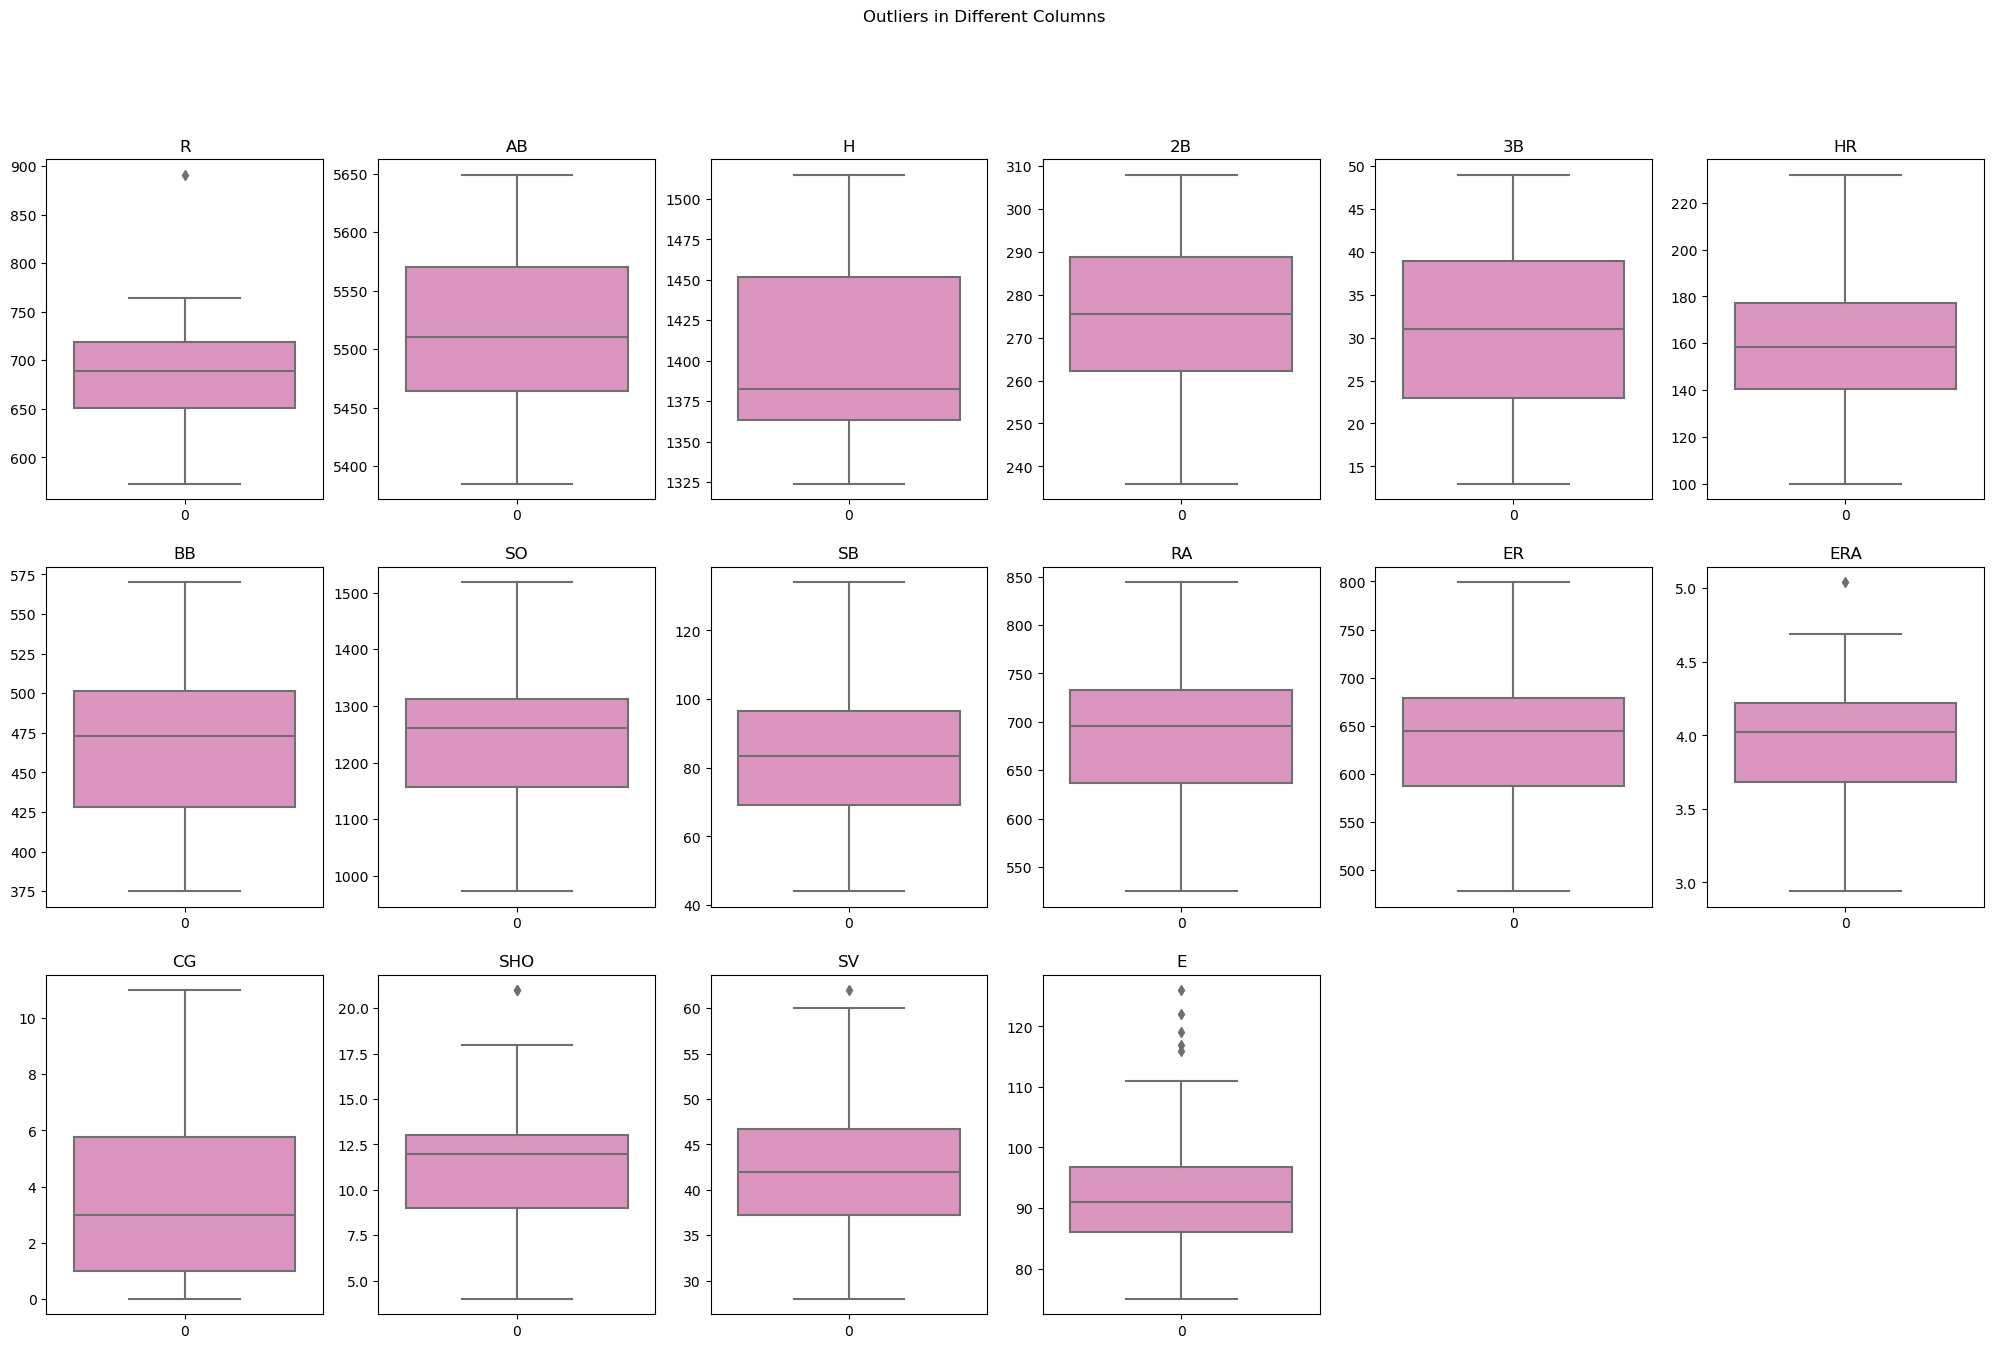

In [273]:
plt.figure(figsize=(25, 15))
for i,column in enumerate(data_file.columns[1:18],1):
    plt.subplot(3,6,i)
    sns.boxplot(data=data_file[column],palette='Set2_r')
    plt.title(column)
# Add a main title
plt.suptitle('Outliers in Different Columns')    
plt.show()

In [274]:
#Removing Outliers by using 
from scipy.stats import zscore
# Calculate Z-scores for each column
independent = data_file.drop('W',axis=1)
z=np.abs(zscore(independent))
np.where(z>3)
data_file=data_file[(z<3).all(axis=1)]

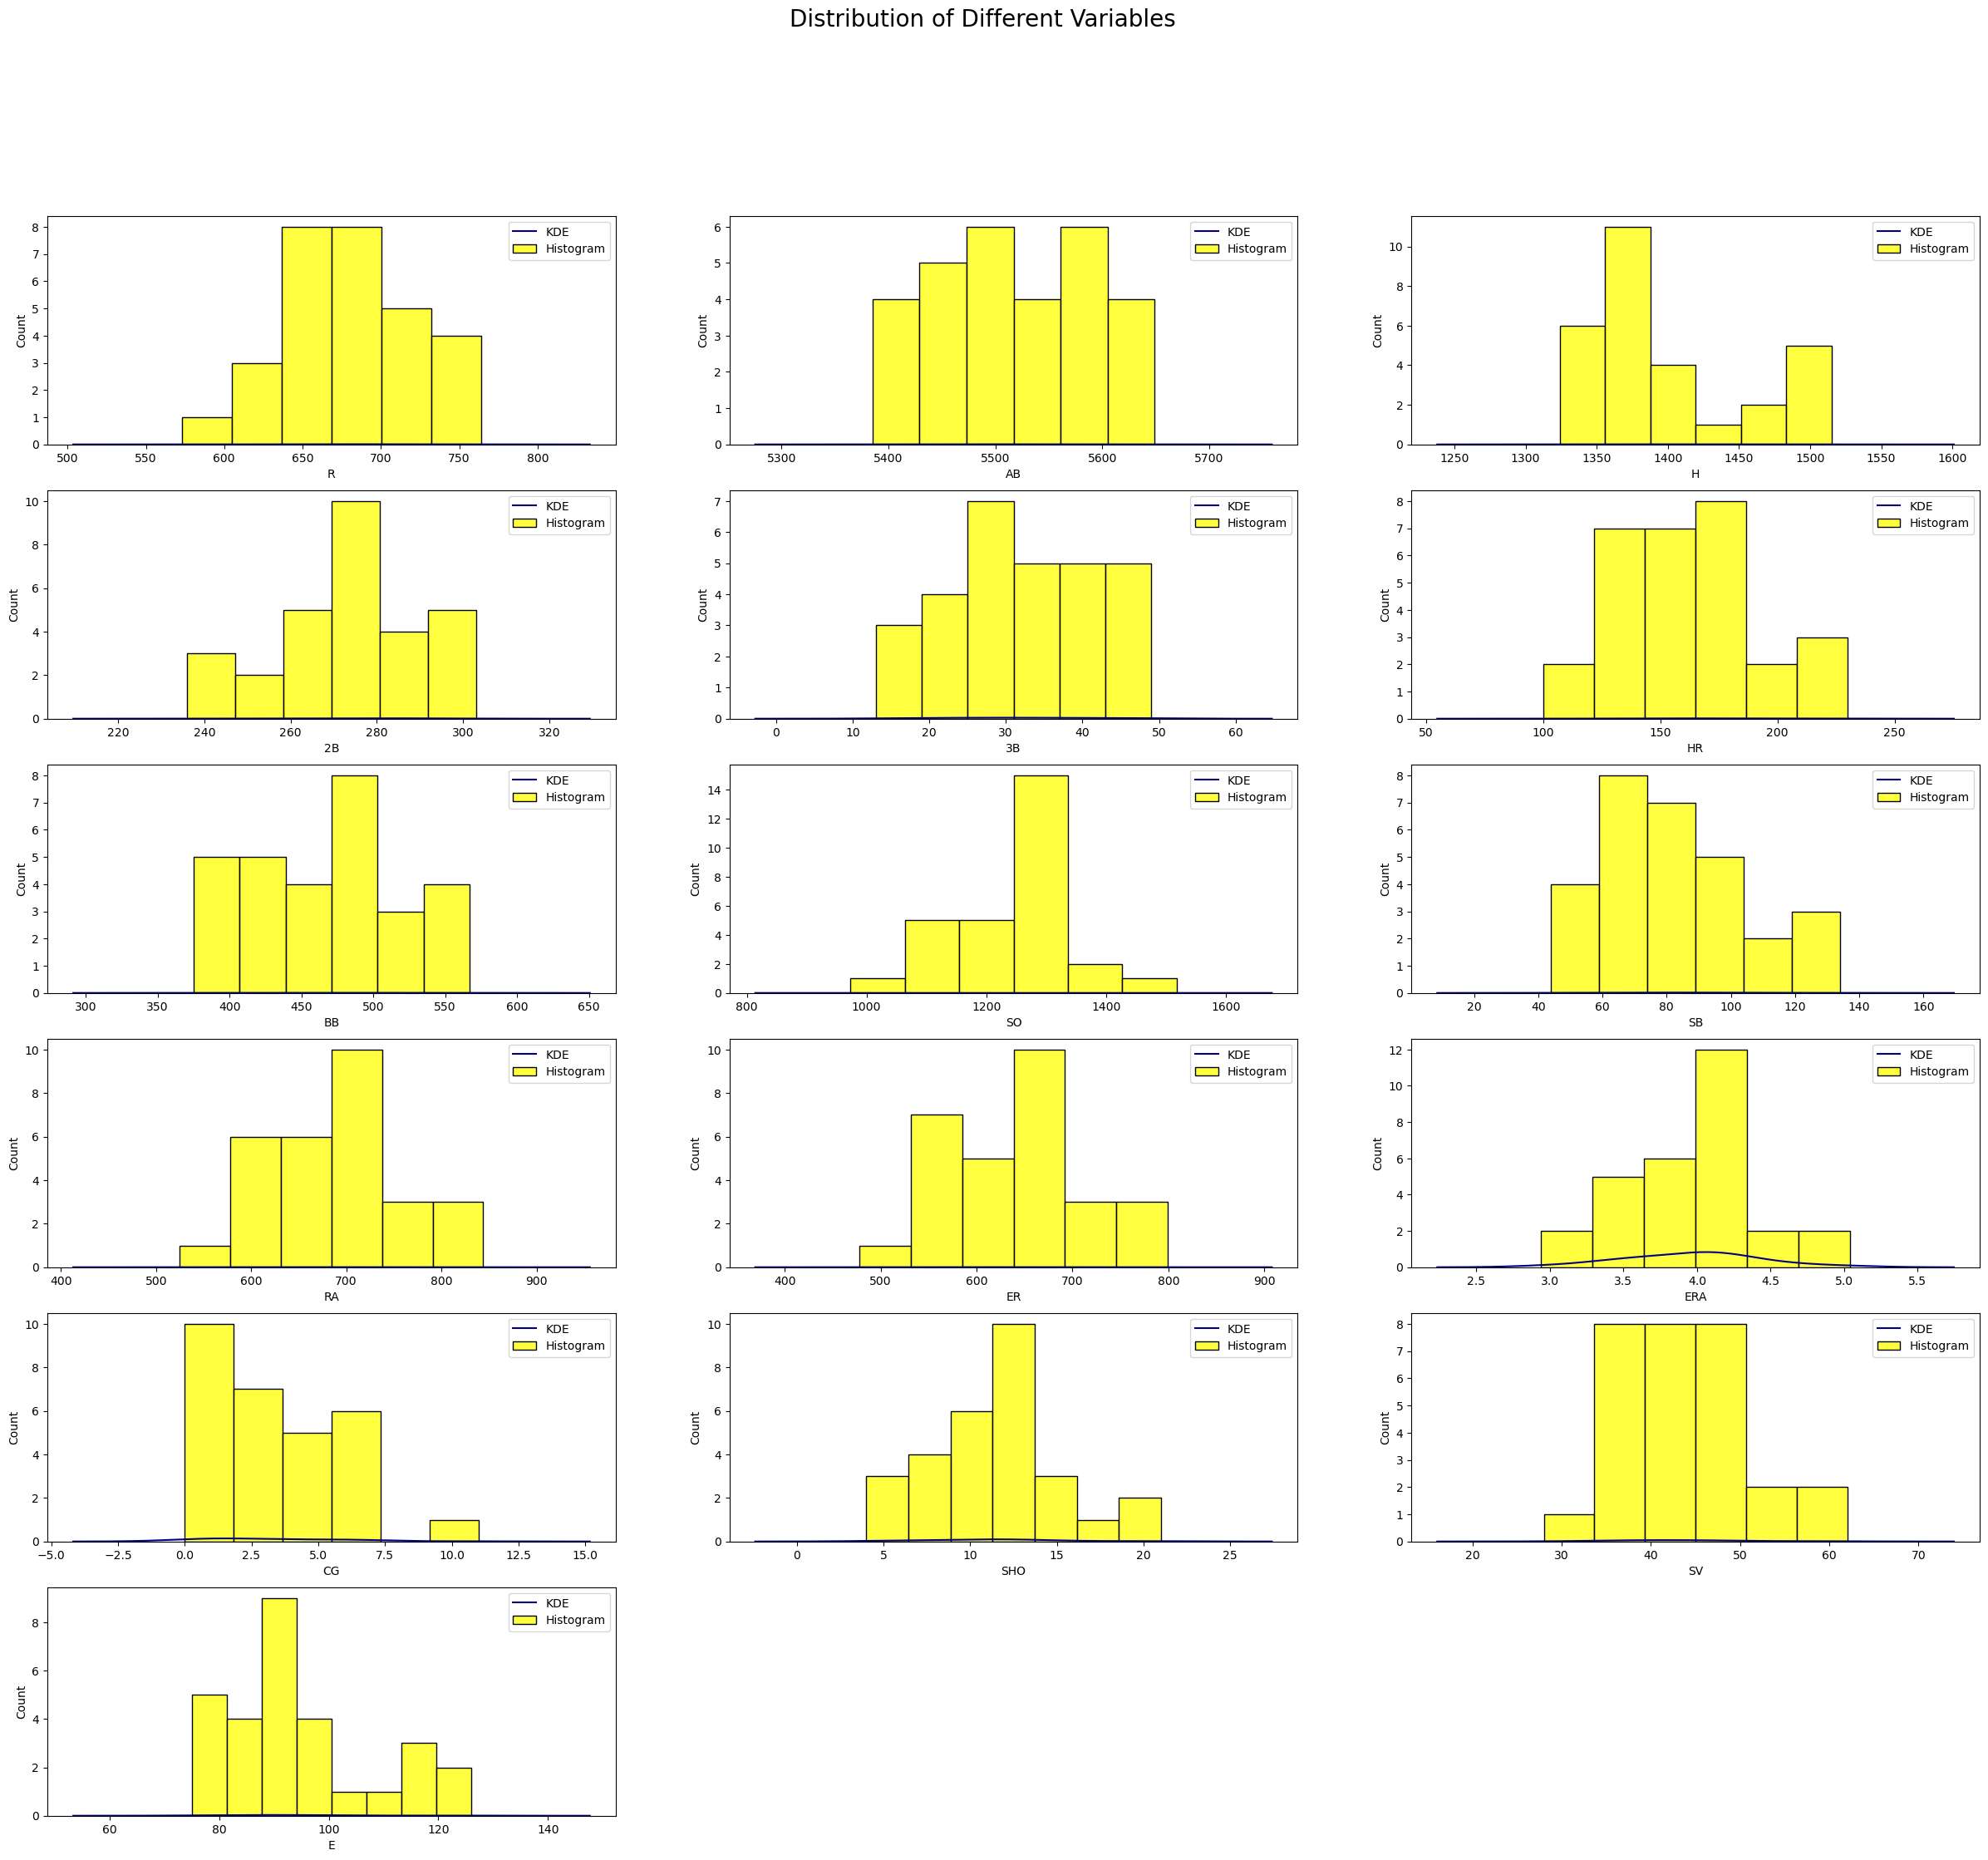

In [275]:
 plt.figure(figsize=(30,25))
for i, column in enumerate(data_file.columns[1:18], 1):
    plt.subplot(6, 3, i)
    sns.histplot(data=data_file[column], color='yellow',label='Histogram')
    sns.kdeplot(data=data_file[column], color='navy', label='KDE')
    plt.legend()
# Add a main title
plt.suptitle('Distribution of Different Variables', fontsize=20) 
plt.show()

In [276]:
data_file.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

### Model Selection -Regression

#### Now I will be goning with the Regression and our target variable will be 'Wins'

####  Splitting the data into training and test

In [277]:
#seperating independent variable and target into x and y
x=data_file.drop('W',axis=1)
y=data_file['W']
print('Dimension of independent',x.shape)
print('Dimension of Target',y.shape)

Dimension of independent (29, 16)
Dimension of Target (29,)


#### Feature Scaling using Standard Scalarization

In [278]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.363013,0.159299,-1.090948,-0.614898
5,1.856900,0.716535,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-0.128586,-1.785822,0.601593,-0.111574
6,0.712585,-0.447345,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.247285,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.447345,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.874386,0.159299,2.163939,0.032233
8,1.497899,1.752672,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.128586,-0.326982,-0.439971,0.176039
9,1.565212,-0.078310,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.617213,-0.570122,0.211006,1.757915


#### Checking Variance Inflation Factor(VIF)

In [279]:
#Checking Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,7.229564,R
1,18.333377,AB
2,10.558458,H
3,3.743423,2B
4,3.278636,3B
5,8.426403,HR
6,3.431971,BB
7,2.720640,SO
8,2.110804,SB
9,197.315706,RA


### Insights from VIF Analysis

1. **Very High Multicollinearity:**
   - **RA (197.32)**, **ER (1825.87)**, **ERA (1438.82)**
     - These features exhibit extreme multicollinearity, indicating redundancy.

2. **High Multicollinearity:**
   - **AB (18.33)**
     - Indicates high correlation with other features.

3. **Moderate Multicollinearity:**
   - **H (10.56)**, **HR (8.43)**, **R (7.23)**, **SV (6.24)**
     - These features show moderate levels of multicollinearity.

4. **Low to Moderate Multicollinearity:**
   - **2B (3.74)**, **3B (3.28)**, **BB (3.43)**, **CG (3.07)**, **SHO (3.67)**, **E (2.18)**
     - These features have acceptable VIF values.

5. **Minimal Multicollinearity:**
   - **SO (2.72)**, **SB (2.11)**
     - These features have the lowest VIF values, indicating minimal multicollinearity.

#### Performing PCA(Principal Component Analysis (PCA))

In [280]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95) # Retain 95% of the variance
x=pca.fit_transform(x)

- We have scaled the data using the standard scaler method to ensure that all features contribute equally to the analysis, thus overcoming the issue of bias caused by varying scales of the features.
- We have used the PCA method to manage bias and highly collinear in the data by transforming the original features into a set of orthogonal components, which helps in reducing dimensionality and capturing the most important variance in the data.

In [281]:
from sklearn.model_selection import train_test_split

Now finding Best random state

In [282]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#find the best random State
max_accuracy=0
best_state=0
random_state=range(1,200)
for state in random_state:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>max_accuracy:
        max_accuracy=acc
        best_state=state
print("Maximum R2_Score is=>",max_accuracy,"On Random State=>",best_state)

Maximum R2_Score is=> 0.8811944081874298 On Random State=> 1


In [283]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=best_state)

#### Linear Regression

In [284]:
LR=LinearRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
accuracy_LR=r2_score(y_test,LR_pred)
print('R2 Score:-',accuracy_LR*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,LR_pred))
print('Mean Squared Error:-',mean_squared_error(y_test,LR_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,LR_pred)))

R2 Score:- 88.11944081874297
Mean Absolute Error:- 3.4550516485136438
Mean Squared Error:- 15.867146817634376
Root Mean Squared Error: 3.9833587357447957


<Figure size 500x300 with 0 Axes>

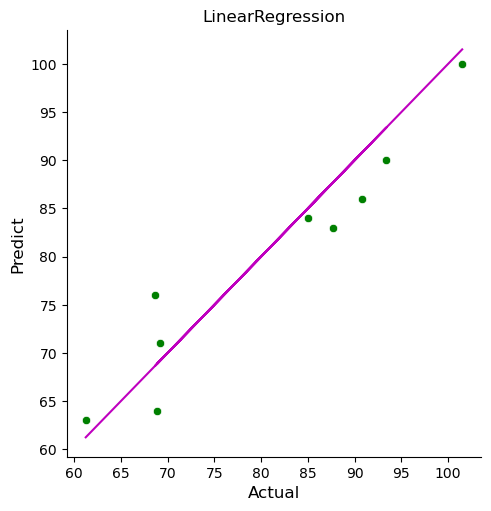

In [285]:
plt.figure(figsize=(5,3))
sns.relplot(x=LR_pred,y=y_test,color='g')
plt.plot(LR_pred,LR_pred,color='m')
plt.xlabel('Actual',fontsize=12)
plt.ylabel('Predict',fontsize=12)
plt.title('LinearRegression',fontsize=12)
plt.show()

### Random Forest Regressor

In [286]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR_pred=RFR.predict(x_test)
accuracy_RFR=r2_score(y_test,RFR_pred)
print('R2 Score',accuracy_RFR*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,RFR_pred))
print('Mean Squared Error:-',mean_squared_error(y_test,RFR_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,RFR_pred)))

R2 Score 69.22424292845257
Mean Absolute Error:- 5.277777777777776
Mean Squared Error:- 41.10273333333333
Root Mean Squared Error: 6.411141344045796


<Figure size 500x300 with 0 Axes>

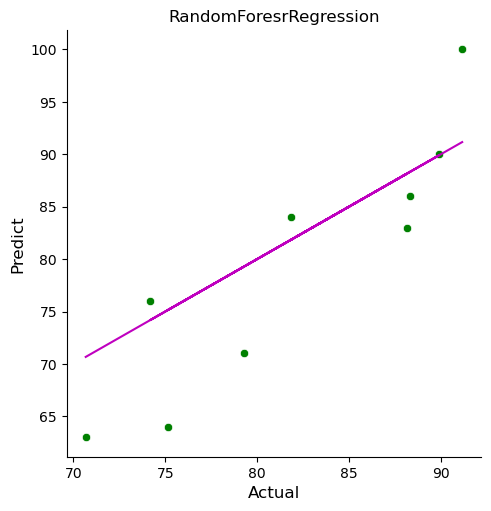

In [287]:
plt.figure(figsize=(5,3))
sns.relplot(x=RFR_pred,y=y_test,color='g')
plt.plot(RFR_pred,RFR_pred,color='m')
plt.xlabel('Actual',fontsize=12)
plt.ylabel('Predict',fontsize=12)
plt.title('RandomForesrRegression',fontsize=12)
plt.show()

#### ExtraTrees Regressor

In [288]:
from sklearn.ensemble import ExtraTreesRegressor
ETC=ExtraTreesRegressor()
ETC.fit(x_train,y_train)
ETC_pred=ETC.predict(x_test)
accuracy_ETC=r2_score(y_test,ETC_pred)
print('R2 Score',accuracy_ETC*100)
print('Mean absolute Error',mean_absolute_error(y_test,ETC_pred))
print('Mean Squared Error',mean_squared_error(y_test,ETC_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,ETC_pred)))

R2 Score 70.33055740432613
Mean absolute Error 5.018888888888889
Mean Squared Error 39.62518888888888
Root Mean Squared Error: 6.294854159461431


<Figure size 500x300 with 0 Axes>

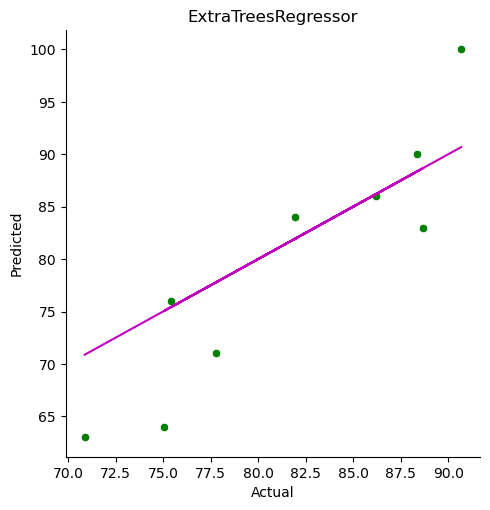

In [289]:
plt.figure(figsize=(5,3))
sns.relplot(x=ETC_pred,y=y_test,color='g')
plt.plot(ETC_pred,ETC_pred,color='m')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('ExtraTreesRegressor')
plt.show()

### Lasso Regressor

In [290]:
from sklearn.linear_model import Lasso
LS=Lasso()
LS.fit(x_train,y_train)
pred_ls=LS.predict(x_test)
accuracy_ls=r2_score(y_test,pred_ls)
print('R2 Score:',accuracy_ls*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ls))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

R2 Score: 89.73068801495579
Mean Absolute Error: 3.0506703121097223
Mean Squared Error: 13.715236673359051
Root Mean Squared Error: 3.703408791013902


<Figure size 500x300 with 0 Axes>

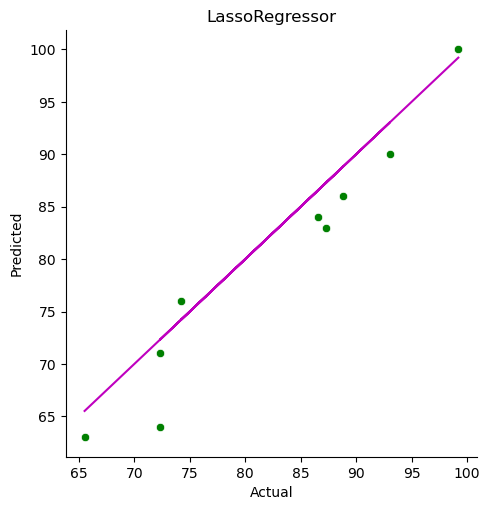

In [291]:
plt.figure(figsize=(5,3))
sns.relplot(x=pred_ls,y=y_test,color='g')
plt.plot(pred_ls,pred_ls,color='m')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LassoRegressor')
plt.show()

### Redge Regressor

In [292]:
from sklearn.linear_model import Ridge
RG=Ridge()
RG.fit(x_train,y_train)
RG_pred=RG.predict(x_test)
accuracy_RG=r2_score(y_test,RG_pred)
print('R2 Score',accuracy_RG*100)
print('Mean Absolute Error',mean_absolute_error(y_test,RG_pred))
print('Mean Squared Error',mean_squared_error(y_test,RG_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,RG_pred)))

R2 Score 88.3919549149733
Mean Absolute Error 3.2827904589349988
Mean Squared Error 15.50318910244679
Root Mean Squared Error: 3.9374089325909227


<Figure size 500x300 with 0 Axes>

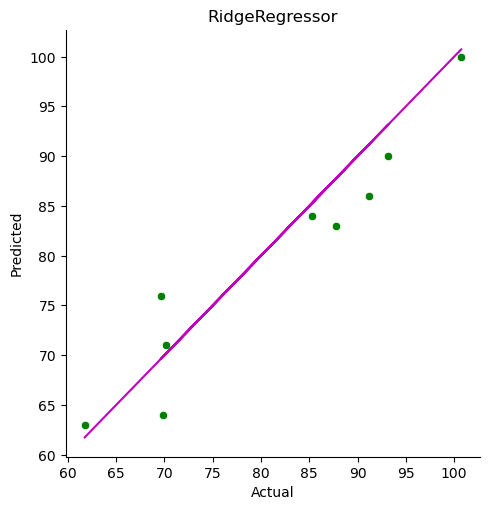

In [293]:
plt.figure(figsize=(5,3))
sns.relplot(x=RG_pred,y=y_test,color='g')
plt.plot(RG_pred,RG_pred,color='m')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RidgeRegressor')
plt.show()

#### K-Neighbors Regressor

In [294]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
accuracy_knn=r2_score(y_test,pred_knn)
print('R2 Score:',accuracy_knn*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score: 64.3494176372712
Mean Absolute Error: 5.444444444444446
Mean Squared Error: 47.613333333333344
Root Mean Squared Error: 6.900241541666012


### GradientBoostingRegressor

In [295]:
from sklearn.ensemble import GradientBoostingRegressor 
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
accuracy_gbr=r2_score(y_test,pred_GBR)
print('R2 Score:',accuracy_gbr*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 Score: 72.63950895450269
Mean Absolute Error: 5.439915974945595
Mean Squared Error: 36.54145581854196
Root Mean Squared Error: 6.044952921118738


### Cross Validation Score

#### Linear Regression

In [296]:
from sklearn.model_selection import cross_val_score

In [297]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,LR_pred)-score.mean())*100)

[ 0.3103143  -2.46325928  0.5271878   0.89368802  0.92026813]
0.037639793054501935
Difference between R2 score and cross validation score is: 84.35546151329278


#### RandomForestRegressor

In [298]:
score2=cross_val_score(RFR,x,y)
print(score2)
print(score2.mean())
print('Difference Between R2 score and cross validation score is:',(r2_score(y_test,RFR_pred)-score2.mean())*100)

[-0.0230542  -2.32701711  0.35126959 -0.30162557  0.607227  ]
-0.3386400569100245
Difference Between R2 score and cross validation score is: 103.08824861945503


### ExtraTreesRegressor

In [299]:
score3=cross_val_score(ETC,x,y)
print(score3)
print(score3.mean())
print('Difference Between R2 score and cross validation score is:',(r2_score(y_test,ETC_pred)-score3.mean())*100)

[ 0.02795943 -1.35359868  0.26019557 -0.3817823   0.73654009]
-0.14213717728523964
Difference Between R2 score and cross validation score is: 84.5442751328501


### Lasso Regressor

In [300]:
score4=cross_val_score(LS,x,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation sccore is:',(r2_score(y_test,pred_ls)-score4.mean())*100)

[ 0.26892286 -1.44496971  0.67904736  0.74988908  0.88374324]
0.22732656589194714
Difference between R2 score and cross validation sccore is: 66.99803142576107


#### Ridge Regressor

In [301]:
score5=cross_val_score(RG,x,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,RG_pred)-score5.mean())*100)

[ 0.40999857 -2.32474007  0.57298445  0.8955483   0.92413145]
0.09558454124291707
Difference between R2 score and cross validation score is: 78.83350079068158


### K-Neighbors Regressor

In [302]:
score6=cross_val_score(knn,x,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_knn)-score6.mean())*100)

[ 0.12754545 -1.46684211  0.49109159  0.34616393  0.77558962]
0.05470969996511414
Difference between R2 score and cross validation score is: 58.87844764075979


### GradientBoostingRegressor

In [303]:
score7=cross_val_score(GBR,x,y)
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_GBR)-score7.mean())*100)

[ 0.02188878 -6.35119206  0.39911777 -0.15894334  0.22094091]
-1.173637587254663
Difference between R2 score and cross validation score is: 190.00326767996899


##### Based on these observations
- The Lasso Regression seems to perform relatively well among the models tested, as it has a high mean cross- validation score and a small difference between accuracy score and cross-validation score
- Lasso Regression is our best  fitting and best performing model

### Hyper Parameter Tuning

In [304]:
from sklearn.model_selection import GridSearchCV

In [305]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],         # Regularization strength
    'max_iter': [1000, 5000, 10000],        # Maximum number of iterations
    'tol': [1e-4, 1e-3, 1e-2],              # Tolerance for optimization
    'fit_intercept': [True, False],         # Whether to calculate the intercept for this model
}

In [306]:
GSCV=GridSearchCV(LS,param_grid,cv=5,scoring='neg_mean_squared_error')

In [307]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 5000, 10000],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='neg_mean_squared_error')

In [308]:
GSCV.best_params_

{'alpha': 0.01, 'fit_intercept': True, 'max_iter': 1000, 'tol': 0.01}

In [318]:
best_model=Lasso(alpha=0.01,fit_intercept=True,max_iter=1000,tol=0.01)
best_model.fit(x_train,y_train)
pred_LS=best_model.predict(x_test)
acc=r2_score(y_test,pred_LS)
print(acc*100)

88.11671012292088


#### By adding parameter my model give 88.11 % accuracy

Text(0.5, 1.0, 'Lasso Regression')

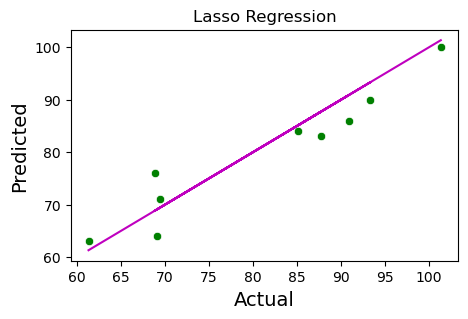

In [319]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred_LS,y=y_test,color='g')
plt.plot(pred_LS,pred_LS,color='m')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso Regression',fontsize=12)

### Saving the Model

In [320]:
#importing joblib and saving model
import joblib
joblib.dump(best_model,"Baseball Case Study Project.pkl")

['Baseball Case Study Project.pkl']

In [323]:
#Now loading file and checcking prediction 
model=joblib.load("Baseball Case Study Project.pkl")

In [324]:
prediction=model.predict(x_test)
prediction

array([101.36232178,  69.3963164 ,  69.0762315 ,  87.68625971,
        85.10164316,  93.35464045,  68.84110792,  90.90695689,
        61.30144932])

In [325]:
Original=np.array(y_test)
df=pd.DataFrame()
df['Original']=Original
df['prediction']=prediction
df.head()

,Original,prediction
0,100,101.362322
1,71,69.396316
2,64,69.076232
3,83,87.686260
4,84,85.101643


Text(0, 0.5, 'Predication')

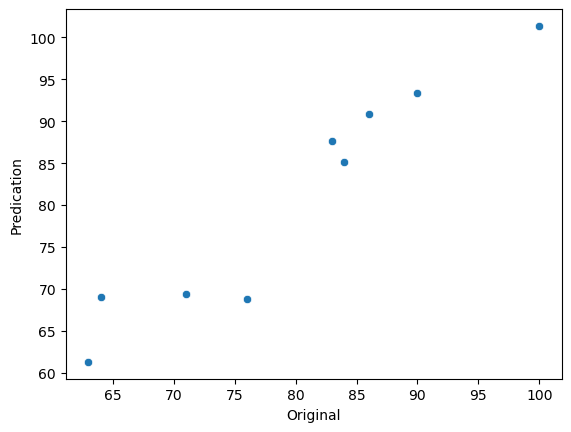

In [326]:
sns.scatterplot(x=Original,y=prediction)
plt.xlabel('Original')
plt.ylabel('Predication')

In the analysis of the BaseBall Case Study data:
- Regression techniques within supervised learning were employed.
- The exploratory data analysis (EDA) process was followed diligently.
- Initial steps involved checking for duplicate records and investigating the relationship between the target variable and independent variables.
- Data visualization techniques were applied, including various graphs, to discern patterns and insights.
- Outliers were identified and removed to enhance the robustness of the models.
- Model performance was further improved through hyperparameter tuning, ensuring optimal parameter settings.
- The dataset was split into training and testing sets for model evaluation.
- Multiple models were evaluated, including techniques like PCA (Principal Component Analysis) and Standardization.
- Lasso Regression emerged as the best-performing model, achieving an impressive 88% accuracy.